In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

# Set all the Constants (hyper parameters)

are hyperparameters that define key aspects of how the training process will be conducted.

1 BATCH_SIZE:

It represents the number of training examples utilized in one iteration. In simple terms, during each iteration of training, the model updates its weights based on a subset of the entire dataset. The choice of batch size can affect training speed and memory requirements.

2 IMAGE_SIZE:

This typically refers to the dimensions (width and height) of the input images. The neural network architecture and the training process often depend on the size of the input images. It's essential to ensure consistency in image size to feed into the network.

3 CHANNEL:

It represents the number of color channels in the input images. For example, RGB images have three channels (Red, Green, Blue). Grayscale images have one channel. The number of channels influences the

In [3]:
BATCH_SIZE=32
IMAGE_SIZE=255
CHANNEL=3
EPOCHS=20


## Import data into tensorflow dataset object

We will use image_dataset_from_directory api to load all images in tensorflow dataset:


1 directory='Potato': This parameter specifies the path to the directory containing your image dataset. In this case, it's assumed that the images are stored in the 'Potato' directory. 

2 seed=123:
The seed parameter sets the random seed for data shuffling and transformations. Using a fixed seed ensures reproducibility, meaning that if you run the code with the same seed, you should get the same results. 

3 shuffle=True:
The shuffle parameter determines whether to shuffle the data. When set to True, it shuffles the order of the images in each epoch, which is beneficial for training to prevent the model from memorizing the order of the data. 

4 image_size=(IMAGE_SIZE, IMAGE_SIZE):
image_size sets the dimensions to which the input images will be resized. The IMAGE_SIZE variable likely holds a specific size, ensuring that all images are standardized to the same dimensions before being fed into the neural network. 


5 batch_size=BATCH_SIZE:
The batch_size parameter defines the number of images in each batch during training. It is set to the value of the BATCH_SIZE variable. Training neural networks in batches helps manage memory efficiently and allows for parallel processing, which can speed up training.

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(directory='Potato/Train',
                                                   seed=123,
                                                   shuffle=True,
                                                   image_size=[IMAGE_SIZE,IMAGE_SIZE],
                                                   batch_size=BATCH_SIZE
                                                   )

Found 900 files belonging to 3 classes.


In [6]:
len(dataset)       #no of datasets  

29

In [7]:
class_names=dataset.class_names
print(class_names)

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


In [8]:
for batch_size,label_size in dataset.take(1): #take one subset --1 batch from  29 batches
    print('image shape',batch_size.shape)     
    print('label',label_size.numpy)
    print('image',batch_size[0])    # img 3 in the batch

image shape (32, 255, 255, 3)
label <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(32,), dtype=int32, numpy=
array([1, 2, 2, 2, 0, 1, 2, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 1, 2, 2,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2], dtype=int32)>>
image tf.Tensor(
[[[146.89827  134.89827  138.89827 ]
  [117.32479  105.32479  109.32479 ]
  [159.80559  147.80559  151.80559 ]
  ...
  [189.00586  179.00586  178.00586 ]
  [188.99608  178.99608  177.99608 ]
  [188.99413  178.99413  177.99413 ]]

 [[125.09177  113.09177  117.09177 ]
  [153.73062  141.73062  145.73062 ]
  [135.74919  123.74919  127.74919 ]
  ...
  [187.0177   177.0177   176.0177  ]
  [187.01765  177.01765  176.01765 ]
  [186.02547  176.02547  175.02547 ]]

 [[131.32344  119.323456 123.323456]
  [126.39447  114.39447  118.39447 ]
  [143.41678  131.41678  135.41678 ]
  ...
  [190.0195   180.0195   179.0195  ]
  [190.00006  180.00006  179.00006 ]
  [190.       180.       179.      ]]

 ...

 [[133.22902  120.22902  127.22902 ]
  [

2025-12-04 15:10:51.427720: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence




32: The batch size, representing the number of images in the batch.

255: The height of each image.

255: The width of each image.

3: The number of color channels (RGB).

=============================================== 

single image

This section shows the pixel values of a single image in the batch. It's a 3D tensor representing the color values of each pixel in the image.
Each pixel has three values (RGB) representing the intensity of red, green, and blue, respectively.
The values range from 0 to 255, where 0 is the absence of color, and 255 is the maximum intensity of that color.

=================================================

label

This part shows the labels corresponding to the images in the batch. It's a 1D tensor with a shape of (32), indicating the label for each image in the batch. The labels seem to be integers, ranging from 0 to 2

2025-12-04 15:10:51.662178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


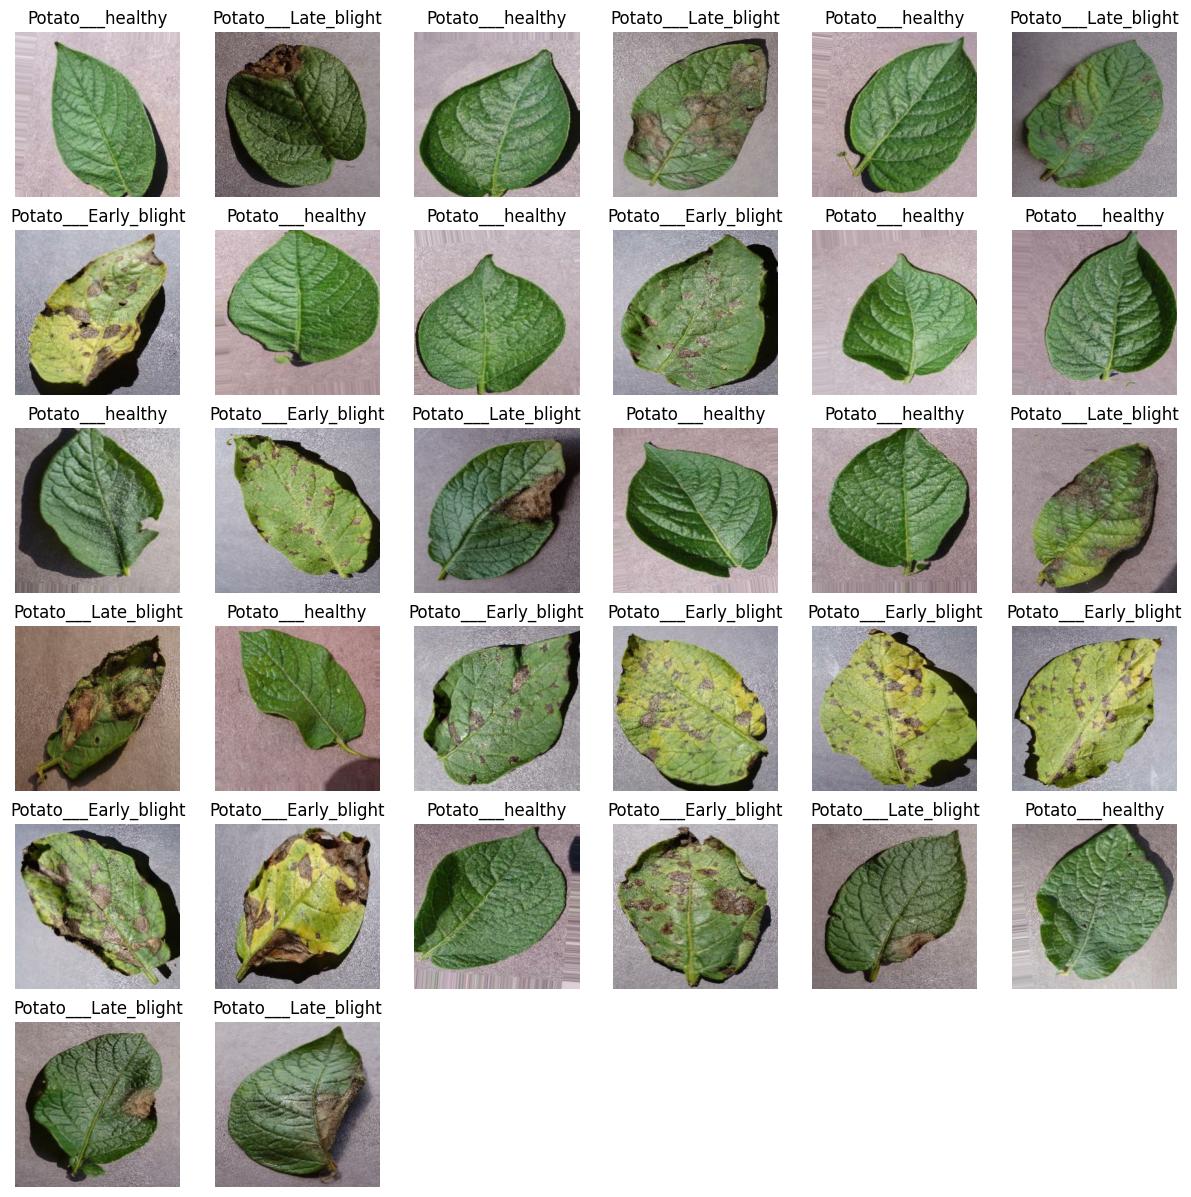

In [10]:
plt.figure(figsize=(15,15))
for img ,label in dataset.take(1):           # runs 32 times 
    for i in range(32):
        plt.subplot(6,6,i+1)       
        plt.imshow(img[i].numpy().astype('uint8'))  
        plt.title(dataset.class_names[label[i]])
        plt.axis('off')

# Function to Split Dataset
Dataset should be bifurcated into 3 subsets, namely:

Training: Dataset to be used while training                                                       
Validation: Dataset to be tested against while training                                                      
Test: Dataset to be tested against after we trained a model                                        

In [12]:
len(dataset)

29

In [13]:
train_size = 0.8
len(dataset) * train_size

23.200000000000003

In [14]:
train_ds = dataset.take(23)
len(train_ds)

23

In [15]:
test_ds = dataset.skip(23)
len(test_ds)

6

In [16]:
val_size = 0.1
len(dataset)*val_size

2.9000000000000004

In [17]:
val_ds = test_ds.take(2)
len(val_ds)

2

In [18]:
test_ds = test_ds.skip(2)
len(test_ds)

4

In [19]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1  #assert==if
    
    ds_size = len(ds)
    
    if shuffle:                                  #true
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

23

In [21]:
len(val_ds)

2

In [22]:
len(test_ds)

4

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
import tensorflow as tf
from tensorflow.keras import layers

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])


# Data Augmentation
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [26]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

# Applying Data Augmentation to Train Dataset

In [28]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

# Model Architecture
We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

In [30]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 255, 255, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 253, 253, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 126, 126, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 124, 124, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

# Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [33]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [34]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20,
)

Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 595ms/step - accuracy: 0.3616 - loss: 1.1003 - val_accuracy: 0.2188 - val_loss: 1.1598
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 560ms/step - accuracy: 0.3672 - loss: 1.0593 - val_accuracy: 0.2344 - val_loss: 1.0305
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 634ms/step - accuracy: 0.5184 - loss: 0.9099 - val_accuracy: 0.7656 - val_loss: 0.8690
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 656ms/step - accuracy: 0.6822 - loss: 0.7902 - val_accuracy: 0.7656 - val_loss: 0.6748
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 637ms/step - accuracy: 0.5890 - loss: 0.8464 - val_accuracy: 0.7500 - val_loss: 0.6257
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 675ms/step - accuracy: 0.7345 - loss: 0.6223 - val_accuracy: 0.7656 - val_loss: 0.6151
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 657ms/step - accuracy: 0.7867 - loss: 0.4852 - val_accuracy: 0.8750 - val_loss: 0.3571
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 632ms/step - accuracy: 0.8263 - loss: 0.4261 - val_accu

In [35]:
scores = model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9531 - loss: 0.0856


# Plotting the Accuracy and Loss Curves

In [37]:
print(history)
print(history.params)
print(history.history.keys())

{'verbose': 1, 'epochs': 20, 'steps': 23}
dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [38]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.100308895111084,
 1.0593160390853882,
 0.9098657965660095,
 0.7901918888092041,
 0.8464473485946655]

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

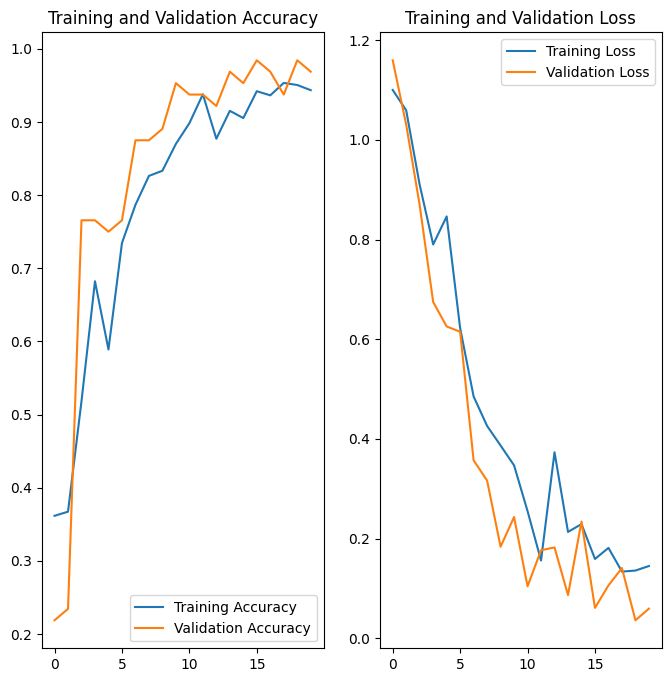

In [40]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [41]:
model = tf.keras.models.load_model('model.h5')

# Run prediction on a sample image

In [43]:
model = tf.keras.models.load_model('model.h5')

first image to predict
actual label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
predicted label: Potato___Late_blight


2025-12-04 15:15:52.823134: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


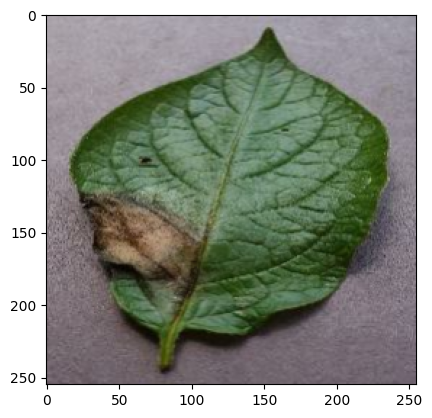

In [44]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

# Write a function for inference

first image to predict
actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
predicted label: Potato___healthy


2025-12-04 15:15:53.173561: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


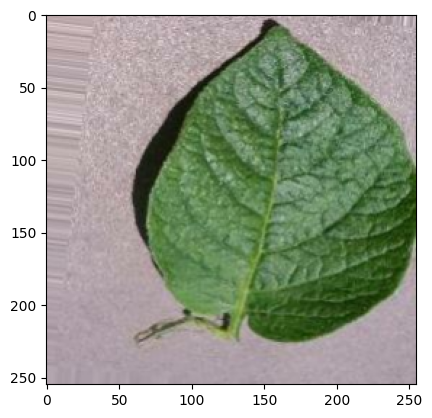

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


2025-12-04 15:15:53.740555: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


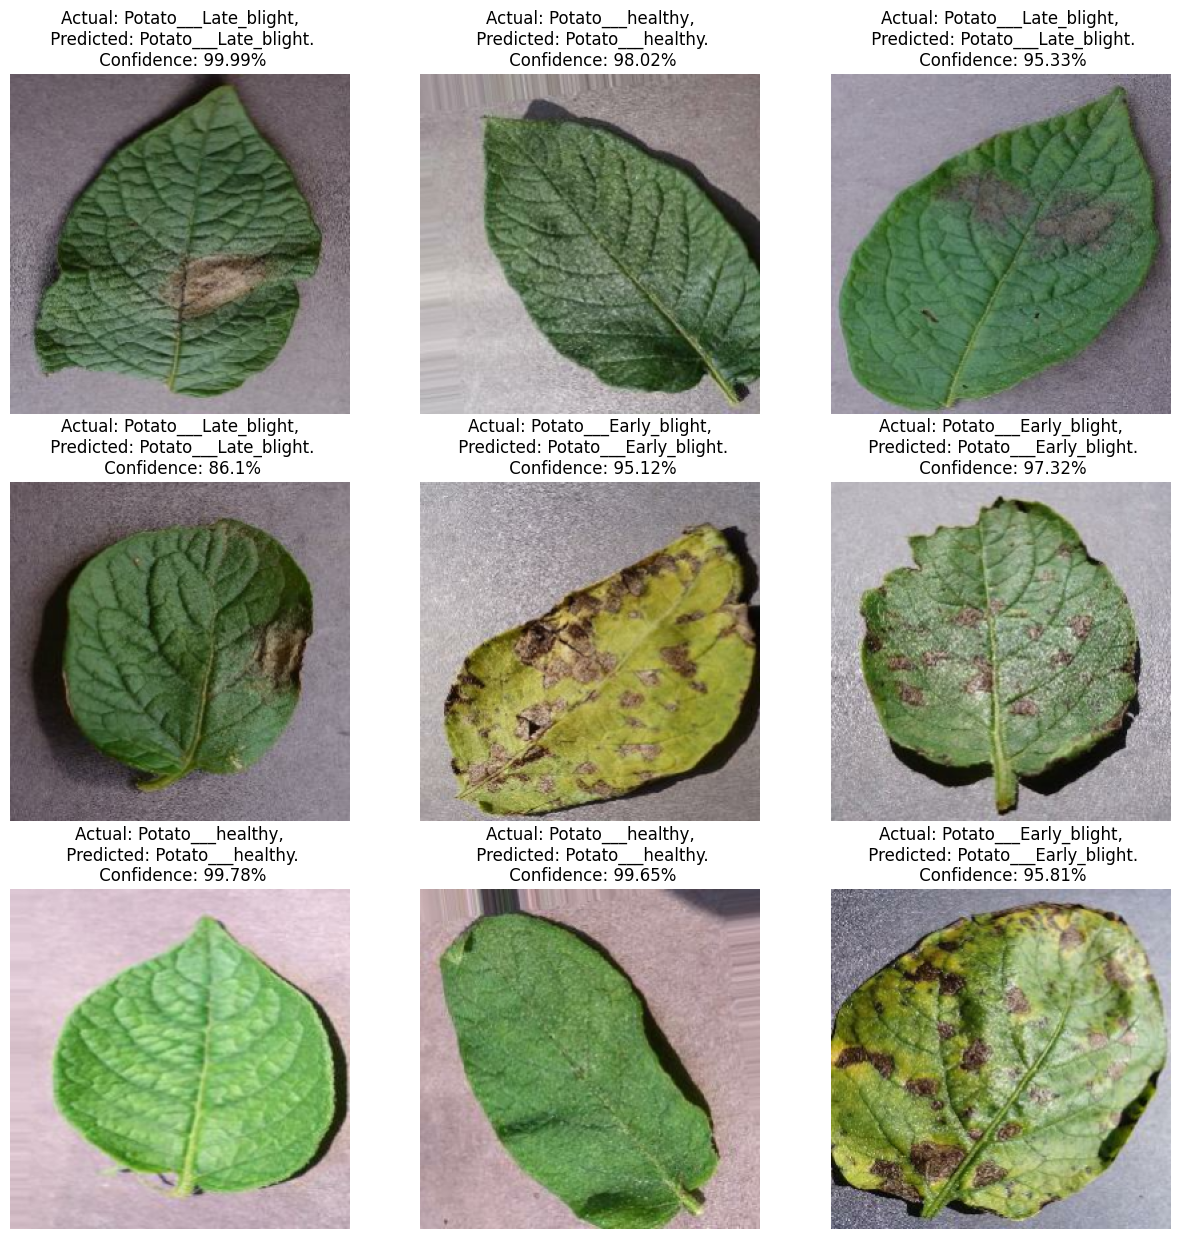

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [49]:
# Write a function for inference

In [50]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


2025-12-04 15:15:54.689158: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


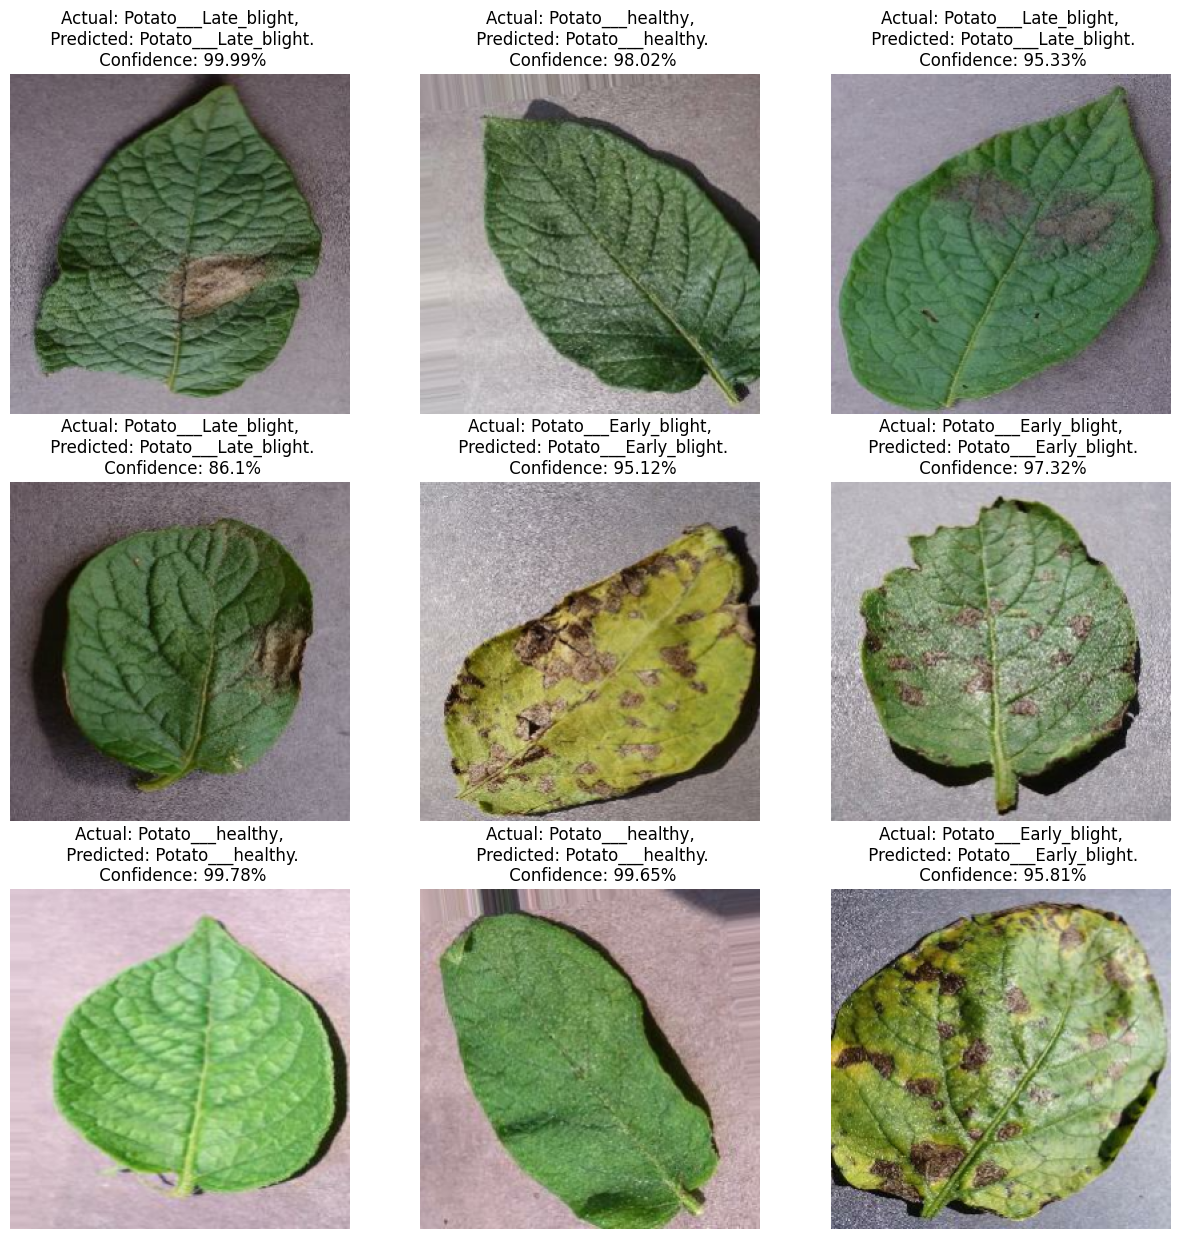

In [51]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming INPUT_SHAPE = (256, 256, 3) and NUM_CLASSES = 3 are defined globally
def build_lenet(input_shape=(256, 256, 3), num_classes=3):
    """Builds a LeNet-5 model adapted for general input size."""
    model = models.Sequential(name="LeNet-5")
    
    # C1: Convolution 
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'))
    # S2: Average Pooling
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    
    # C3: Convolution
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'))
    # S4: Average Pooling
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    
    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    
    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# 1. Instantiate the model by CALLING the function with parentheses ()
lenet_model_instance = build_lenet() 

# 2. Call .summary() on the resulting Keras model object
lenet_model_instance.summary()

Model: "LeNet-5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 256, 256, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 128, 128, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 62, 62, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 61504)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 120)            │     7,380,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,393,891 (28.21 MB)

 Trainable params: 7,393,891 (28.21 MB)

 Non-trainable params: 0 (0.00 B)

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
import sys

# ==============================================================================
# 1. CONSTANTS AND DATA SETUP (Crucial for fixing ValueError)
# ==============================================================================

IMAGE_SIZE = 256  # Must match the size expected by the model architecture
BATCH_SIZE = 32
EPOCHS = 20
DATA_DIR = 'Potato/Train'
INPUT_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3)
NUM_CLASSES = 3  # Assuming 3 classes: Healthy, EarlyBlight, LateBlight

# --- Data Loading (Using your provided method) ---
print(f"Loading data from directory: {DATA_DIR}...")
try:
    # 1. Load Training Dataset (80% of data)
    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory=DATA_DIR,
        seed=123,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE), # Use 256x256
        batch_size=BATCH_SIZE,
        validation_split=0.2,
        subset='training'
    )

    # 2. Load Validation/Test Dataset (20% of data)
    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        directory=DATA_DIR,
        seed=123,
        shuffle=True,
        image_size=(IMAGE_SIZE, IMAGE_SIZE), # Use 256x256
        batch_size=BATCH_SIZE,
        validation_split=0.2,
        subset='validation'
    )
    # NOTE: Since you only have train/validation split from one directory, 
    # we'll use val_ds for both validation and evaluation for simplicity here.
    test_ds = val_ds 

    class_names = train_ds.class_names
    NUM_CLASSES = len(class_names)
    print(f"Number of Classes: {NUM_CLASSES}")

except Exception as e:
    print(f"\nERROR: Data loading failed. Using mock data. ({e})")
    # --- MOCK DATA FALLBACK ---
    NUM_CLASSES = 3
    X_mock = np.random.rand(100, *INPUT_SHAPE).astype('float32')
    y_mock = np.random.randint(0, NUM_CLASSES, 100)
    
    # Create batched tf.data.Dataset objects for the structure below
    train_ds = tf.data.Dataset.from_tensor_slices((X_mock[:80] * 255.0, y_mock[:80])).batch(BATCH_SIZE)
    val_ds = tf.data.Dataset.from_tensor_slices((X_mock[80:] * 255.0, y_mock[80:])).batch(BATCH_SIZE)
    test_ds = val_ds


# --- Normalization and Performance Setup ---
def normalize_and_convert_labels(image, label):
    # Normalize images from [0, 255] to [0, 1]
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

# Apply normalization and caching
train_ds = train_ds.map(normalize_and_convert_labels).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.map(normalize_and_convert_labels).cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.map(normalize_and_convert_labels).cache().prefetch(buffer_size=tf.data.AUTOTUNE)


# ==============================================================================
# 2. MODEL DEFINITION
# ==============================================================================

def build_lenet(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES):
    """Builds a LeNet-5 model."""
    model = models.Sequential(name="LeNet-5")
    model.add(layers.Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=input_shape, padding='same'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(layers.Conv2D(16, kernel_size=(5, 5), activation='relu', padding='valid'))
    model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(120, activation='relu'))
    model.add(layers.Dense(84, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


# ==============================================================================
# 3. EXECUTION: INSTANTIATION, COMPILATION, TRAINING, EVALUATION
# ==============================================================================

# --- 3.1. Model Instantiation ---
lenet_model = build_lenet(input_shape=INPUT_SHAPE, num_classes=NUM_CLASSES)
print("\nModel created: LeNet-5")

# --- 3.2. Model Compilation ---
# NOTE: We use SparseCategoricalCrossentropy because image_dataset_from_directory 
# with int labels (default) and subsequent .map() without one-hot encoding means labels are integers.
lenet_model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)
print("Model compiled.")

# --- 3.3. Model Training ---
print(f"\nStarting training for {EPOCHS} epochs...")

history_lenet = lenet_model.fit(
    train_ds,
    validation_data=val_ds, # Using val_ds for validation
    verbose=1,
    epochs=EPOCHS,
)

# --- 3.4. Model Evaluation ---
print("\nEvaluating model on the test dataset...")
scores_lenet = lenet_model.evaluate(test_ds, verbose=0)

# Print the final results
print("\n==============================================")
print("         LeNet-5 FINAL TEST RESULTS")
print("==============================================")
print(f"LeNet-5 Test Loss: {scores_lenet[0]:.4f}")
print(f"LeNet-5 Test Accuracy: {scores_lenet[1] * 100:.2f}%")

Loading data from directory: Potato/Train...
Found 900 files belonging to 3 classes.
Using 720 files for training.
Found 900 files belonging to 3 classes.
Using 180 files for validation.
Number of Classes: 3

Model created: LeNet-5
Model compiled.

Starting training for 20 epochs...
Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 445ms/step - accuracy: 0.6694 - loss: 0.7284 - val_accuracy: 0.8722 - val_loss: 0.3455
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 426ms/step - accuracy: 0.8833 - loss: 0.3052 - val_accuracy: 0.7667 - val_loss: 0.5401
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 418ms/step - accuracy: 0.8736 - loss: 0.2829 - val_accuracy: 0.8500 - val_loss: 0.3317
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 416ms/step - accuracy: 0.9389 - loss: 0.1714 - val_accuracy: 0.8500 - val_loss: 0.3256
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.9681 - loss: 0.1002 - val_accuracy: 0.8722 - val_loss: 0.4827
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 9s 412ms/step - accuracy: 0.9764 

ERROR: 'history_dict' is not defined. Please run the model training cell first.


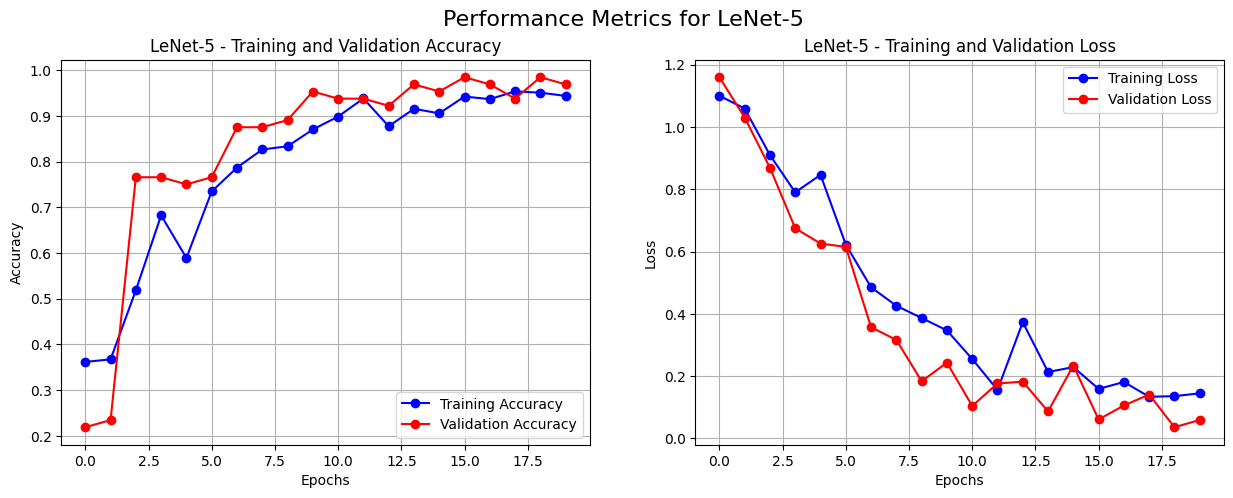

In [54]:
import matplotlib.pyplot as plt
import numpy as np


model_name = "LeNet-5"
try:
    # Correctly retrieve the History object for LeNet-5
    history = history_dict[model_name] 
except NameError:
    print("ERROR: 'history_dict' is not defined. Please run the model training cell first.")
    exit()

# --- 2. Extract Data ---
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Determine EPOCHS from the length of the history list
EPOCHS = len(acc) 
epochs_range = range(EPOCHS)

# --- 3. Plotting ---
plt.figure(figsize=(15, 5)) # Use a wider figure size for better readability

# === Subplot 1: Accuracy ===
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro-', label='Validation Accuracy')
plt.title(f'{model_name} - Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)

# === Subplot 2: Loss ===
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, 'bo-', label='Training Loss')
plt.plot(epochs_range, val_loss, 'ro-', label='Validation Loss')
plt.title(f'{model_name} - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)

# --- 4. Display ---
plt.suptitle(f'Performance Metrics for {model_name}', fontsize=16)
plt.show()

In [55]:
# Evaluate the LeNet model on the test dataset
lenet_scores = lenet_model.evaluate(test_ds)

# Display the results
print(f"LeNet Test Loss: {lenet_scores[0]}")
print(f"LeNet Test Accuracy: {lenet_scores[1]*100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.8722 - loss: 0.3313
LeNet Test Loss: 0.33132725954055786
LeNet Test Accuracy: 87.22%


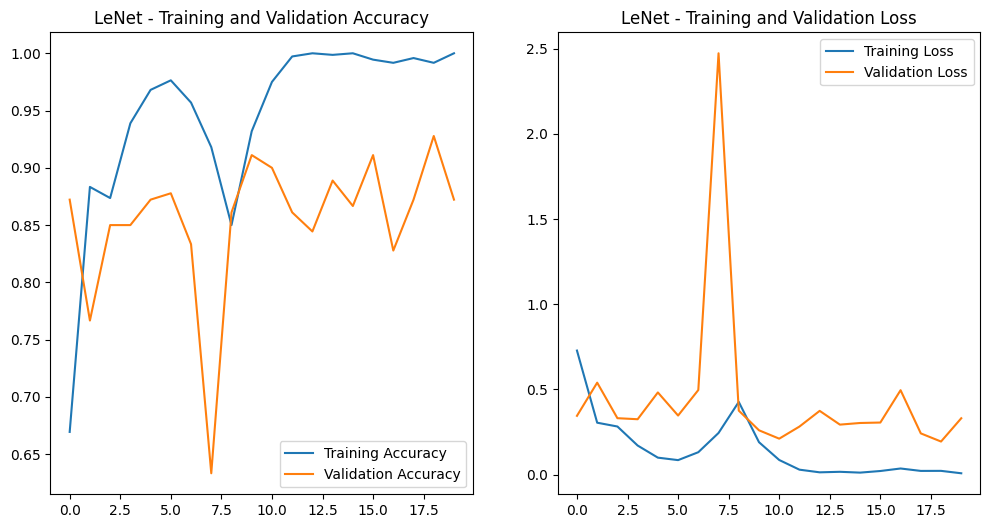

In [56]:
import matplotlib.pyplot as plt

# Access history from your training
acc = history_lenet.history['accuracy']
val_acc = history_lenet.history['val_accuracy']

loss = history_lenet.history['loss']
val_loss = history_lenet.history['val_loss']

# Get the number of epochs trained
epochs_range = range(len(acc))

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# === Subplot 1: Accuracy ===
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('LeNet - Training and Validation Accuracy')

# === Subplot 2: Loss ===
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('LeNet - Training and Validation Loss')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


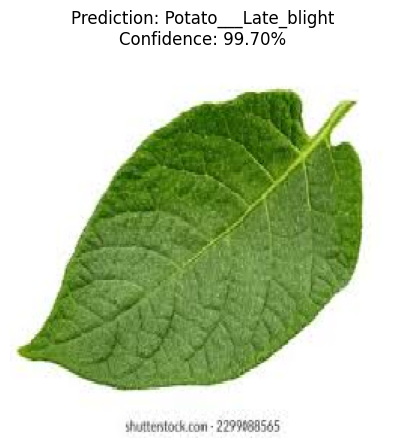

Predicted Label: Potato___Late_blight
Confidence: 99.70%


In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image_from_local(model, image_path, class_names):
    
    
    try:
        img = image.load_img(image_path, target_size=(256, 256))
    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
        return


    img_array = image.img_to_array(img)
    

    img_batch = np.expand_dims(img_array, axis=0)
    

    img_batch = img_batch / 255.0

    
    predictions = model.predict(img_batch)
    

    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence = np.max(predictions[0]) * 100

    plt.figure(figsize=(5, 5))
    plt.imshow(img) # Display the loaded image
    plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

    print(f"Predicted Label: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")


path_to_image = "potatoleaf.png" 



predict_image_from_local(lenet_model, path_to_image, class_names)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

def predict_image_from_local(model, image_path, class_names):
    
    
    try:
        img = image.load_img(image_path, target_size=(256, 256))
    except FileNotFoundError:
        print(f"Error: The file at {image_path} was not found.")
        return


    img_array = image.img_to_array(img)
    

    img_batch = np.expand_dims(img_array, axis=0)
    

    img_batch = img_batch / 255.0

    
    predictions = model.predict(img_batch)
    

    predicted_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_index]
    confidence = np.max(predictions[0]) * 100

    plt.figure(figsize=(5, 5))
    plt.imshow(img) # Display the loaded image
    plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis("off")
    plt.show()

    print(f"Predicted Label: {predicted_class}")
    print(f"Confidence: {confidence:.2f}%")


path_to_image = "mangolleaf.png" 



predict_image_from_local(lenet_model, path_to_image, class_names)